In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
pip install Augmentor

In [ ]:
import Augmentor

ModuleNotFoundError: No module named 'Augmentor'

In [ ]:
#train Image
p=Augmentor.Pipeline("/content/drive/My Drive/pnemoniadatasets/train", output_directory="/content/drive/My Drive/pnemoniadatasets/train/output")

KeyboardInterrupt: 

In [ ]:
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

p.sample(1000)

In [ ]:
q=Augmentor.Pipeline("/content/drive/My Drive/pnemoniadatasets/test", output_directory="/content/drive/My Drive/pnemoniadatasets/test/output")

KeyboardInterrupt: 

In [ ]:
q.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

q.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

q.sample(1000)

Processing <PIL.Image.Image image mode=L size=1032x752 at 0x78A4C45A3D60>: 100%|██████████| 1000/1000 [01:30<00:00, 11.04 Samples/s]


In [ ]:
#Val Image
r=Augmentor.Pipeline("/content/drive/My Drive/pnemoniadatasets/val", output_directory="/content/drive/My Drive/pnemoniadatasets/val/output")
r.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

r.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

r.sample(1000)

Initialised with 16 image(s) found.
Output directory set to /content/drive/My Drive/pnemoniadatasets/val/output.

Processing <PIL.Image.Image image mode=L size=1072x712 at 0x78A4C451BDC0>: 100%|██████████| 1000/1000 [01:28<00:00, 11.29 Samples/s]


In [ ]:
data_dir = "/content/drive/My Drive/pnemoniadatasets/train/output"

data_dir_val = "/content/drive/My Drive/pnemoniadatasets/val/output"
data_dir_test = "/content/drive/My Drive/pnemoniadatasets/test/output"

In [ ]:
import os

count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/My Drive/pnemoniadatasets/val/output'):
    count += len(files)
print('file count:', count)

file count: 1000


In [ ]:
img_height=224
img_width=224
batch_size=32

import tensorflow as tf


train_ds=tf.keras.utils.image_dataset_from_directory(
     data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle = False,
  image_size=(img_height, img_width),
  batch_size=batch_size,

)


val_ds=tf.keras.utils.image_dataset_from_directory(
     data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle = False,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [ ]:
normalization_layer= tf.keras.layers.Rescaling(1./255)

In [ ]:
!pip install tensorflow
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
base_model = DenseNet201(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# freeze the first 10 layers

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)
x=Dropout(0.4)(x)
predictions=Dense(2, activation='softmax')(x)
model1=Model(base_model.inputs, outputs=predictions)

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
!pip install tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
base_model = ResNet50(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)

# freeze the first 10 layers


for layer in base_model.layers:
        layer.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)
x=Dropout(0.4)(x)
predictions=Dense(2, activation='softmax')(x)
model2=Model(base_model.inputs, outputs=predictions)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath="/content/drive/MyDrive/pnemoniamodel1 -{epoch:03d}-{val_accuracy:.5f}.hdf5"

checkpoint=ModelCheckpoint(
    filepath= model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1

)

model1.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

model2.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor = 'accuracy',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.001

                                           )

In [ ]:
history1 = model1.fit(train_ds, epochs=5,
validation_data= val_ds, callbacks=[learning_rate_reduction, checkpoint])

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 8.7768 - accuracy: 0.7237
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/MyDrive/pnemoniamodel1 -001-1.00000.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 32s 666ms/step - loss: 8.7768 - accuracy: 0.7237 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 7.8621 - accuracy: 0.4288
Epoch 2: val_accuracy did not improve from 1.00000
25/25 [==============================] - 9s 352ms/step - loss: 7.8621 - accuracy: 0.4288 - val_loss: 0.2693 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.6237
Epoch 3: val_accuracy did not improve from 1.00000
25/25 [==============================] - 7s 290ms/step - loss: 0.6919 - accuracy: 0.6237 - val_loss: 0.2317 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/5
25/25 [==============================] - ETA: 0s - loss: 0.6268 - accuracy: 0.6400
Epoch 4: val_accuracy did not improve from 1.00000
25/25 [==============================] - 8s 331ms/step - loss: 0.6268 - accuracy: 0.6400 - val_loss: 0.2875 - val_accuracy: 0.9850 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath1="/content/drive/MyDrive/pnemoniamodel2 -{epoch:03d}-{val_accuracy:.5f}.hdf5"

checkpoint1=ModelCheckpoint(
    filepath= model_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1

)

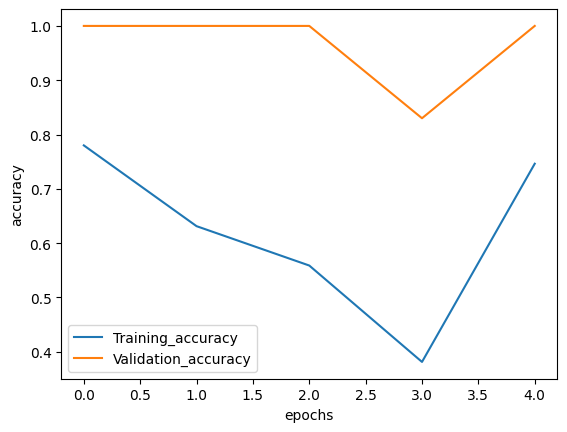

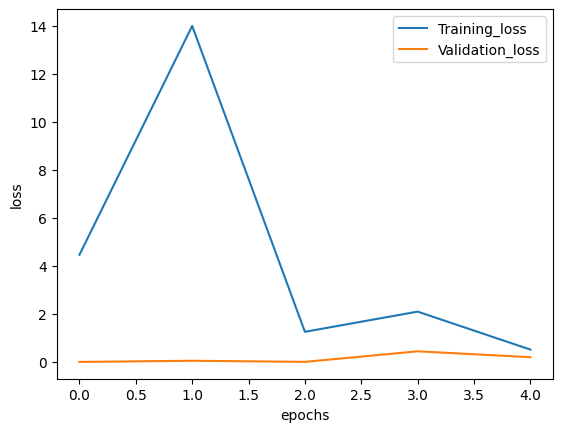

In [ ]:
accs = history1.history['accuracy']
val_accs = history1.history['val_accuracy']
import matplotlib.pyplot as plt

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()


accs1 = history1.history['loss']
val_accs1 = history1.history['val_loss']

plt.plot(range(len(accs1)),accs1, label = 'Training_loss')
plt.plot(range(len(accs1)),val_accs1, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
history2 = model2.fit(train_ds, epochs=5,
validation_data= val_ds, callbacks=[learning_rate_reduction, checkpoint1])

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 9.4161 - accuracy: 0.6975
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/MyDrive/pnemoniamodel2 -001-1.00000.hdf5
25/25 [==============================] - 20s 620ms/step - loss: 9.4161 - accuracy: 0.6975 - val_loss: 2.8014e-08 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 6.6998 - accuracy: 0.4875
Epoch 2: val_accuracy did not improve from 1.00000
25/25 [==============================] - 9s 336ms/step - loss: 6.6998 - accuracy: 0.4875 - val_loss: 0.1907 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.6700
Epoch 3: val_accuracy did not improve from 1.00000
25/25 [==============================] - 8s 337ms/step - loss: 0.5833 - accuracy: 0.6700 - val_loss: 0.0477 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/5
25/25 [==============================] - ETA: 0

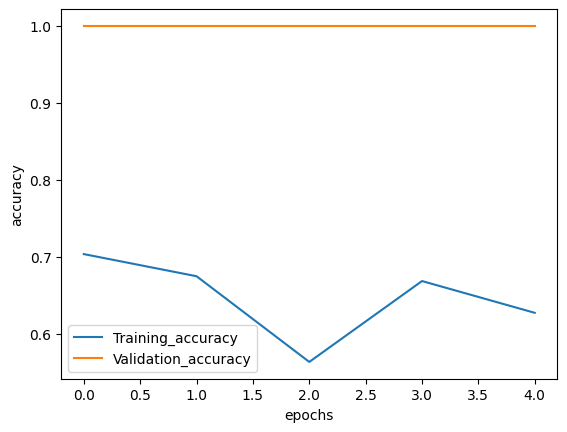

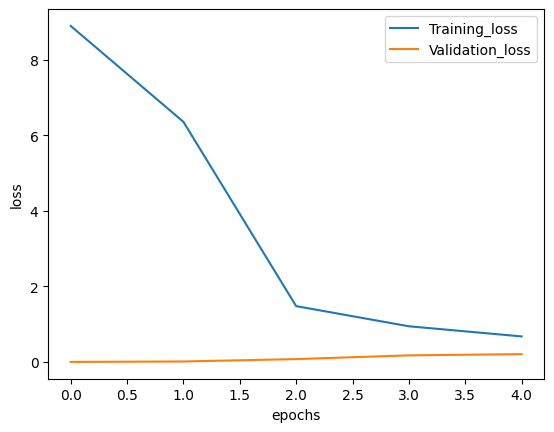

In [ ]:
accs = history2.history['accuracy']
val_accs = history2.history['val_accuracy']
import matplotlib.pyplot as plt

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()


accs1 = history2.history['loss']
val_accs1 = history2.history['val_loss']

plt.plot(range(len(accs1)),accs1, label = 'Training_loss')
plt.plot(range(len(accs1)),val_accs1, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/pnemoniamodel1 -001-1.00000.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/pnemoniamodel2 -001-1.00000.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
print(model_1.outputs)
print(model_2.outputs)
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history3 = ensemble_model.fit(train_ds, epochs=5,
validation_data= val_ds, callbacks=[learning_rate_reduction])


[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_7')>]
[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_9')>]
Epoch 1/5
25/25 [==============================] - 315s 12s/step - loss: 4.4320 - accuracy: 0.6775 - val_loss: 0.0298 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - 309s 13s/step - loss: 1.1503 - accuracy: 0.5975 - val_loss: 0.2550 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - 304s 12s/step - loss: 0.6304 - accuracy: 0.6775 - val_loss: 0.2619 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/5
25/25 [==============================] - 307s 12s/step - loss: 0.5746 - accuracy: 0.6775 - val_loss: 0.1366 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/5
25/25 [==============================] - 274s 11s/step - loss: 0.5997 - accuracy: 0.6762 - val_loss: 0.0768 - val_accuracy: 1.0000 - lr: 0.0010


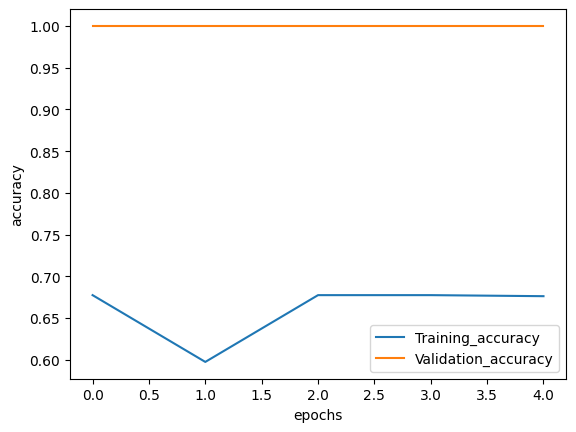

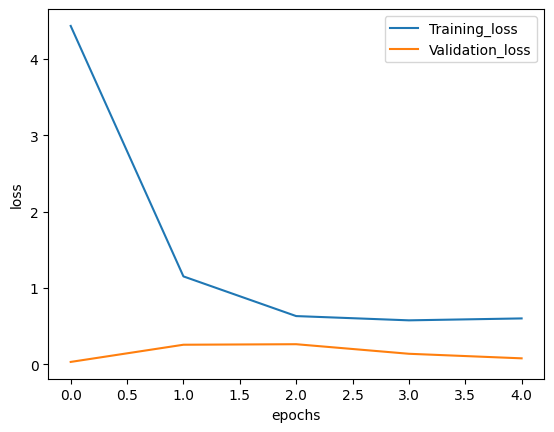

In [ ]:
accs = history3.history['accuracy']
val_accs = history3.history['val_accuracy']
import matplotlib.pyplot as plt

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()


accs1 = history3.history['loss']
val_accs1 = history3.history['val_loss']

plt.plot(range(len(accs1)),accs1, label = 'Training_loss')
plt.plot(range(len(accs1)),val_accs1, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()
